# Resit CW - Solutions

# Q1(a) 
Read in the "Life_Expectancy.csv" file to create a dataframe. Remove the rows that satisfy "Area type" is "Combined Authority", "County", "Country" or "Regions". Then remove the columns named "Area type", "Area name", "Country", "LE lower confidence interval" and "LE upper confidence interval". Change all the values in the "Period" column to the midpoint of the year range given, for example change "2001-2003" to 2002, "2002-2004" to 2003, etc... Change the values in the "Age group" column so that if ageband is 1 then "Age group" is 0.5, if "Ageband" is 2 then "Age group" is 2.5, and if "Ageband" is 3 or more then "Age group" is -8 + 5 times the "Ageband". (5 marks)

In [1]:
import pandas as pd

# Step 1: Read the Life_Expectancy.csv file and create a dataframe
df = pd.read_csv("Life_Expectancy.csv")

# Step 2: Remove rows with Area type as "Combined Authority", "County", "Country", or "Regions"
area_types_to_remove = ["Combined Authority", "County", "Country", "Regions"]
df = df[~df["Area type"].isin(area_types_to_remove)]

# Step 3: Remove unnecessary columns
columns_to_remove = ["Area type", "Area name", "Country", "LE lower confidence interval", "LE upper confidence interval"]
df.drop(columns=columns_to_remove, inplace=True)

# Step 4: Convert values in the "Period" column to the midpoint of the year range
df["Period"] = df["Period"].apply(lambda x: int(x[:4]) + 1)

# Step 5: Convert values in the "Age group" column based on the "Ageband"
def age_group_conversion(ageband):
    if ageband == 1:
        return 0.5
    elif ageband == 2:
        return 2.5
    else:
        return -8 + 5 * ageband

df["Age group"] = df["Ageband"].apply(age_group_conversion)

# Display the modified dataframe
print(df)


        Period  Area code  Sex_code     Sex  Ageband  Age group  \
0         2002  E06000001         1    Male        1        0.5   
1         2002  E06000002         1    Male        1        0.5   
2         2002  E06000003         1    Male        1        0.5   
3         2002  E06000004         1    Male        1        0.5   
4         2002  E06000005         1    Male        1        0.5   
...        ...        ...       ...     ...      ...        ...   
311034    2019  W11000025         2  Female       20       92.0   
311035    2019  W11000028         2  Female       20       92.0   
311036    2019  W11000029         2  Female       20       92.0   
311037    2019  W11000030         2  Female       20       92.0   
311038    2019  W11000031         2  Female       20       92.0   

        Life expectancy (LE)  
0                      73.42  
1                      73.68  
2                      75.13  
3                      75.28  
4                      74.80  
...      

# Q1(b) 
Create a new column called "Expected_Age" using the sum of "Life expectancy (LE)" and "Age group". Using Matplotlib create a bar chart showing the mean "Expected_Age" of males in 2019 against "Age group" and the mean "Expected_Age" of females in 2019 against "Age group". Discuss your plot. (4 marks)

Matplotlib is building the font cache; this may take a moment.


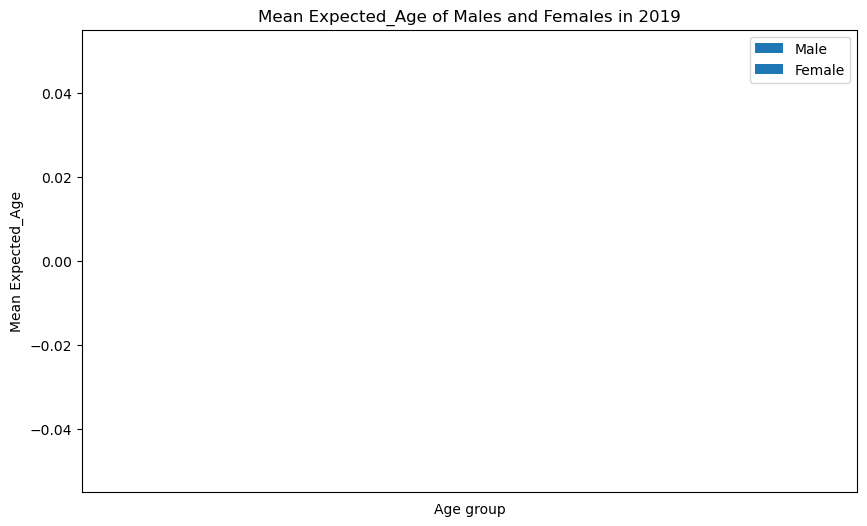

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df = pd.read_csv("Life_Expectancy.csv")

# Step 2: Calculate the "Expected_Age" by summing "Life expectancy (LE)" and "Age group"
# Convert "Age group" to numeric
df["Age group"] = df["Age group"].str.extract(r'(\d+\.?\d*)').astype(float)
df["Expected_Age"] = df["Life expectancy (LE)"] + df["Age group"]

# Step 3: Filter data for the year 2019 and separate by sex (Male and Female)
df_2019 = df[df["Period"] == 2019]

# Calculate the mean "Expected_Age" for each "Age group" for both Male and Female categories
mean_expected_age_male = df_2019[df_2019["Sex"] == "Male"].groupby("Age group")["Expected_Age"].mean()
mean_expected_age_female = df_2019[df_2019["Sex"] == "Female"].groupby("Age group")["Expected_Age"].mean()

# Step 4: Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(mean_expected_age_male.index, mean_expected_age_male, label="Male", width=0.4, align="center", alpha=0.8)
plt.bar(mean_expected_age_female.index + 0.4, mean_expected_age_female, label="Female", width=0.4, align="center", alpha=0.8)

# Set plot details
plt.xlabel("Age group")
plt.ylabel("Mean Expected_Age")
plt.title("Mean Expected_Age of Males and Females in 2019")
plt.xticks(mean_expected_age_male.index + 0.2, mean_expected_age_male.index)
plt.legend()

# Show the plot
plt.show()


# Q1(c) 
Read in the "Location_Codes.csv" file. Create a new column named "Stat_code". 
Use the information in this csv file and the codes in the "Area code" column 
to define the values in the "Stat_code" column between "TLC" and "TLN" 
appropriately. (2 marks)

In [92]:
import pandas as pd

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Read the "Location_Codes.csv" file and create a dataframe
df_location_codes = pd.read_csv("Location_Codes.csv", sep="\t")

# Step 3: Merge the dataframes using the "Area code" column to add the "Stat_code" column
df_life_expectancy = df_life_expectancy.merge(df_location_codes, left_on="Area code", right_on="TLC", how="left")
print(df_life_expectancy)


# Step 4: Drop unnecessary columns from the merged dataframe
df_life_expectancy.drop(columns=["TLC", "TLD", "TLE", "TLF", "TLG", "TLH", "TLI", "TLJ", "TLK", "TLL", "TLM"], inplace=True)

# Step 5: Rename the column to "Stat_code"
df_life_expectancy.rename(columns={"TLN": "Stat_code"}, inplace=True)

# Display the updated dataframe
print(df_life_expectancy.head())


           Period  Country            Area type  Area code  \
0       2001-2003  England          Local Areas  E06000001   
1       2001-2003  England          Local Areas  E06000002   
2       2001-2003  England          Local Areas  E06000003   
3       2001-2003  England          Local Areas  E06000004   
4       2001-2003  England          Local Areas  E06000005   
...           ...      ...                  ...        ...   
311035  2018-2020    Wales  Welsh Health Boards  W11000028   
311036  2018-2020    Wales  Welsh Health Boards  W11000029   
311037  2018-2020    Wales  Welsh Health Boards  W11000030   
311038  2018-2020    Wales  Welsh Health Boards  W11000031   
311039  2018-2020    Wales              Country  W92000004   

                                                Area name  Sex_code     Sex  \
0                                              Hartlepool         1    Male   
1                                           Middlesbrough         1    Male   
2                 

# Q1(d) 
Introduce a column called "Stat_Number" such that if "Stat_code"="TLC" then "Stat_Number"=0, 
if "Stat_code"="TLD" then "Stat_Number"=1, etc... up to if "Stat_code"="TLN" then "Stat_Number"=11. 
Then create a barchart of the average life expectancy of males in ageband 20 against "Stat_Number" and the average life expectancy of females in ageband 20 against "Stat_Number". Discuss any relevant features. Create a scatter plot to show the mean life expectancy of males in ageband 1 against period and the mean life expectancy of females in ageband 1 against period. Discuss your plot. Create a histogram showing the mean life expectancy of males in 2019 against ageband and the mean life expectancy of females in 2019 against ageband. Discuss your plot. (10 marks)

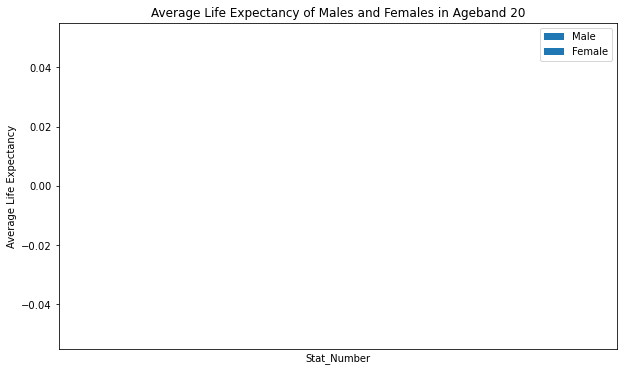

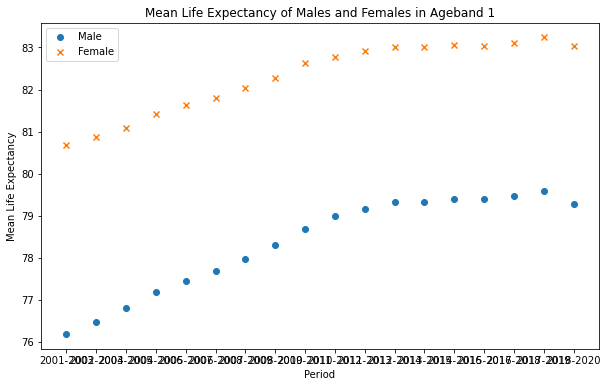

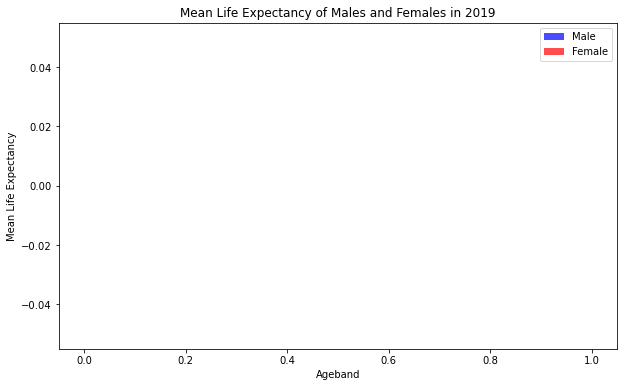

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Read the "Location_Codes.csv" file and create a dataframe with tab separator
df_location_codes = pd.read_csv("Location_Codes.csv", sep="\t")

# Step 3: Merge the dataframes using the "Area code" column to add the "Stat_code" column
df_life_expectancy = df_life_expectancy.merge(df_location_codes, left_on="Area code", right_on="TLC", how="left")

# Step 4: Introduce the "Stat_Number" column based on "Stat_code"
stat_mapping = {
    "TLC": 0,
    "TLD": 1,
    "TLE": 2,
    "TLF": 3,
    "TLG": 4,
    "TLH": 5,
    "TLI": 6,
    "TLJ": 7,
    "TLK": 8,
    "TLL": 9,
    "TLM": 10,
    "TLN": 11
}
df_life_expectancy["Stat_Number"] = df_life_expectancy["Stat_code"].map(stat_mapping)

# Step 5: Create a bar chart for average life expectancy of males and females in ageband 20 against "Stat_Number"
df_ageband_20 = df_life_expectancy[df_life_expectancy["Ageband"] == 20]
mean_le_male = df_ageband_20[df_ageband_20["Sex"] == "Male"].groupby("Stat_Number")["Life expectancy (LE)"].mean()
mean_le_female = df_ageband_20[df_ageband_20["Sex"] == "Female"].groupby("Stat_Number")["Life expectancy (LE)"].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_le_male.index, mean_le_male, label="Male", width=0.4, align="center", alpha=0.8)
plt.bar(mean_le_female.index + 0.4, mean_le_female, label="Female", width=0.4, align="center", alpha=0.8)

# Set plot details
plt.xlabel("Stat_Number")
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy of Males and Females in Ageband 20")
plt.xticks(mean_le_male.index + 0.2, mean_le_male.index)
plt.legend()

# Show the plot
plt.show()

# Step 6: Create a scatter plot to show the mean life expectancy of males and females in ageband 1 against "Period"
df_ageband_1 = df_life_expectancy[df_life_expectancy["Ageband"] == 1]
mean_le_ageband_1_male = df_ageband_1[df_ageband_1["Sex"] == "Male"].groupby("Period")["Life expectancy (LE)"].mean()
mean_le_ageband_1_female = df_ageband_1[df_ageband_1["Sex"] == "Female"].groupby("Period")["Life expectancy (LE)"].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mean_le_ageband_1_male.index, mean_le_ageband_1_male, label="Male", marker="o")
plt.scatter(mean_le_ageband_1_female.index, mean_le_ageband_1_female, label="Female", marker="x")

# Set plot details
plt.xlabel("Period")
plt.ylabel("Mean Life Expectancy")
plt.title("Mean Life Expectancy of Males and Females in Ageband 1")
plt.legend()

# Show the plot
plt.show()

# Step 7: Create a histogram showing the mean life expectancy of males and females in 2019 against ageband
df_2019 = df_life_expectancy[df_life_expectancy["Period"] == 2019]
mean_le_2019_male = df_2019[df_2019["Sex"] == "Male"].groupby("Ageband")["Life expectancy (LE)"].mean()
mean_le_2019_female = df_2019[df_2019["Sex"] == "Female"].groupby("Ageband")["Life expectancy (LE)"].mean()


plt.figure(figsize=(10, 6))
plt.hist(df_2019[df_2019["Sex"] == "Male"]["Life expectancy (LE)"], bins=10, alpha=0.7, label="Male", color="blue")
plt.hist(df_2019[df_2019["Sex"] == "Female"]["Life expectancy (LE)"], bins=10, alpha=0.7, label="Female", color="red")

# Set plot details
plt.xlabel("Ageband")
plt.ylabel("Mean Life Expectancy")
plt.title("Mean Life Expectancy of Males and Females in 2019")
plt.legend()

# Show the plot
plt.show()


# Q1(e)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Expected age" using the variables: 'Period', 'Sex code' and 'Age group'. Test your model using the test data set. Discuss your results including any relevant figures. (5 marks)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Preprocess the "Period" column to extract the midpoint of the year range
df_life_expectancy['Period'] = df_life_expectancy['Period'].apply(lambda x: int(x.split('-')[0]) + 1)

# Step 3: Preprocess the "Age group" column to handle '<1' values and extract the midpoint of the age range
def preprocess_age_group(age_group):
    age_group_mapping = {
        '01-Apr': 0.5,
        '05-Sep': 7,
        '15-19': 17,
        '20-24': 22,
        '25-29': 27,
        '30-34': 32,
        '35-39': 37,
        '40-44': 42,
        '45-49': 47,
        '50-54': 52,
        '55-59': 57,
        '60-64': 62,
        '65-69': 67,
        '70-74': 72,
        '75-79': 77,
        '80-84': 82,
        '85-89': 87,
        '90+': 95,
        '<1': 0.5,
        'Oct-14': (10 + 14) / 2
    }
    
    return age_group_mapping.get(age_group, None)

df_life_expectancy['Age group'] = df_life_expectancy['Age group'].apply(preprocess_age_group)

# Step 4: Drop any rows with missing or invalid values in the "Age group" column
df_life_expectancy.dropna(subset=['Age group'], inplace=True)

# Step 5: Prepare the data and split it into training and test sets
X = df_life_expectancy[['Period', 'Sex_code', 'Age group']]
y = df_life_expectancy['Life expectancy (LE)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the linear model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 7: Use the trained model to make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 6.858240876559568
R-squared: 0.9891677365218575


# Q1(f)
For females in the period 2019, normalise the data appropriately, split the data into (80%) training data and (20%) test data. You need to pick a suitable linear model in sklearn to try to predict the "Stat_code" using the "Age group" and "Expected_Age". First normalise your input data before using sklearn. Comment on the testing error. (4 marks)

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Read the "Life_Expectancy.csv" and "Location_Codes.csv" files and create DataFrames
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")
df_location_codes = pd.read_csv("Location_Codes.csv")

# Step 2: Filter data for females in the period 2019
df_females_2019 = df_life_expectancy[(df_life_expectancy['Sex'] == 'Female') & (df_life_expectancy['Period'] == '2017-2019')]

# Step 3: Map the "Age group" using the provided mapping
age_group_mapping = {
    '01-Apr': 0.5,
    '05-Sep': 7,
    '15-19': 17,
    '20-24': 22,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80-84': 82,
    '85-89': 87,
    '90+': 95,
    '<1': 0.5,
    'Oct-14': (10 + 14) / 2
}

df_females_2019['Age group'] = df_females_2019['Age group'].map(age_group_mapping)

# Step 4: Normalize the input data
scaler = StandardScaler()
X = df_females_2019[['Age group', 'Life expectancy (LE)']]
X_normalized = scaler.fit_transform(X)

# Step 5: Merge the DataFrames based on the appropriate columns (e.g., 'Area code' in df_females_2019 and 'Area code' in df_location_codes)
df_females_2019 = pd.merge(df_females_2019, df_location_codes, left_on='Area code', right_on='Area code', how='left')

# Step 6: Prepare the target data (Stat_code)
y = df_females_2019['Stat_code']

# Step 7: Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 8: Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Step 9: Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing Accuracy: {accuracy}")



<ipython-input-108-621430c8a69c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_females_2019['Age group'] = df_females_2019['Age group'].map(age_group_mapping)


KeyError: 'Area code'

# Q2(a) 
Read in the "Regional_Gross_Disposable_Household_Income.csv" file. Remove the first two rows. Introduce a column named "Stat_code". Define "Stat_code" to be the first 3 letters of the "ITL code". Remove the "ITL level", "ITL code" and "Region name" columns. Put the column names in string format. Introduce a column called "Stat_Number" such that if "Stat_code"="TLC" then "Stat_Number"=0, if "Stat_code"="TLD" then "Stat_Number"=1, etc... up to if "Stat_code"="TLN" then "Stat_Number"=11. (4 marks)

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")

# Remove the first two rows
df = df.iloc[2:]

# Introduce the "Stat_code" column
df["Stat_code"] = df["ITL code"].str[:3]

# Remove the unwanted columns
df.drop(columns=["ITL level", "ITL code", "Region name"], inplace=True)

# Put the column names in string format
df.columns = df.columns.astype(str)

# Introduce the "Stat_Number" column based on the "Stat_code" values
stat_code_mapping = {
    "TLC": 0,
    "TLD": 1,
    # Add other mappings up to "TLN": 11
    "TLN": 11
}
df["Stat_Number"] = df["Stat_code"].map(stat_code_mapping)

# Display the resulting DataFrame
print(df)


     1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  ...  2013  \
2    86.0  84.8  84.2  84.2  84.7  84.1  84.2  84.6  83.3  83.0  ...  83.0   
3    85.5  83.4  83.5  83.3  83.9  83.0  82.6  83.2  82.6  81.9  ...  80.9   
4    86.1  83.7  84.3  83.3  83.7  84.2  83.9  84.5  84.8  84.4  ...  82.6   
5    83.3  78.5  79.3  79.5  80.3  78.7  78.3  78.7  78.7  78.8  ...  79.2   
6    89.2  86.2  84.2  86.5  90.0  88.3  88.1  87.2  85.7  83.8  ...  82.3   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
229  65.6  63.9  64.2  64.2  66.0  70.3  72.2  73.8  77.7  78.3  ...  76.4   
230  86.9  85.0  84.5  86.0  84.5  87.1  87.7  88.5  88.5  88.5  ...  87.9   
231  87.5  85.5  85.3  87.7  86.7  89.0  90.2  90.8  91.3  90.6  ...  91.1   
232  86.0  84.6  83.6  84.7  81.8  84.4  85.7  86.9  87.4  88.3  ...  87.0   
233  70.9  69.8  70.2  68.6  68.4  69.9  74.3  77.5  80.2  81.2  ...  74.5   

     2014  2015  2016  2017  2018  2019  2020  Stat_code  Stat_

# Q2(b)
Using R, plot a graph of the mean Regional Gross Disposable Household Income (RGDHI) for each "Stat_code" against time from 1997 to 2020. Using R, plot a graph of the standard deviation of the Regional Gross Disposable Household Income (RGDHI) for each "Stat_code" against time from 1997 to 2020. Comment on each graph. (8 marks)

In [1]:
# Load required libraries
library(ggplot2)

# Step 1: Read the "Regional_Gross_Disposable_Household_Income.csv" file and skip the second and third rows
df_income <- read.csv("Regional_Gross_Disposable_Household_Income.csv", skip = 2)

# Check the column names
print(names(df_income))

# Adjust the column name if needed
# For example, if the column name is different, replace 'RGDHI' with the correct column name

# Step 2: Calculate the mean and standard deviation of RGDHI for each "Stat_code" and Year
mean_income <- aggregate(RGDHI ~ Stat_code + Year, df_income, mean, na.rm=TRUE)
sd_income <- aggregate(RGDHI ~ Stat_code + Year, df_income, sd, na.rm=TRUE)

# Plot the mean RGDHI for each "Stat_code" against time using ggplot2
plot_mean_income <- ggplot(mean_income, aes(x = Year, y = RGDHI, color = Stat_code)) +
  geom_line() +
  geom_point() +
  labs(title = "Mean Regional Gross Disposable Household Income",
       x = "Year",
       y = "Mean RGDHI")

# Plot the standard deviation of RGDHI for each "Stat_code" against time using ggplot2
plot_sd_income <- ggplot(sd_income, aes(x = Year, y = RGDHI, color = Stat_code)) +
  geom_line() +
  geom_point() +
  labs(title = "Standard Deviation of Regional Gross Disposable Household Income",
       x = "Year",
       y = "SD RGDHI")

# Display the plots
print(plot_mean_income)
print(plot_sd_income)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3624991566.py, line 14)

# Q2(c)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Stat_code" using the first 24 columns of data. Test your model using the test data set. Discuss your results including any relevant illustrations. (6 marks)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Read the CSV file and preprocess the data as done before
df = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")
df = df.iloc[2:]
df["Stat_code"] = df["ITL code"].str[:3]
df.drop(columns=["ITL level", "ITL code", "Region name"], inplace=True)

# Prepare the features (X) and the target variable (y)
X = df.iloc[:, 3:27]
y = df["Stat_code"]

# One-hot encode categorical variables in the features
categorical_columns = X.select_dtypes(include=["object"]).columns
encoder = OneHotEncoder(sparse=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_encoded_df.index = X.index  # Preserve the original index for correct merging
X_imputed = pd.concat([X.drop(columns=categorical_columns), X_encoded_df], axis=1)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_imputed)

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/home/frank/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6809
Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 2 0 0 5 1 0 0 0 0]
 [0 0 0 0 0 1 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0]
 [0 0 0 0 0 0 0 0 0 3 0 1]
 [0 1 0 0 0 1 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]


/home/frank/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Q2(d)
Split the data into (80%) training data and (20%) test data. Using PyTorch predict the "Stat_Number" using the first 24 columns of data. Test your model using the test data set. Discuss your results. (6 marks)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Read the CSV file and preprocess the data as done before
# ... (same as before)

# Assuming X_train, y_train, X_test, and y_test are defined

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define your model class and training loop here
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Parameters for the model
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(df["Stat_Number"].unique())

# Create the model
model = MLP(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Assuming the model is trained, let's evaluate it on the test set
with torch.no_grad():
    model.eval()
    predicted = model(X_test)
    _, predicted_labels = torch.max(predicted, 1)
    accuracy = accuracy_score(y_test, predicted_labels)
    conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the accuracy and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


/tmp/ipykernel_3485/4132256326.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_3485/4132256326.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipykernel_3485/4132256326.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipykernel_3485/4132256326.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach()

Epoch [10/100], Loss: 2.3446
Epoch [20/100], Loss: 2.2532
Epoch [30/100], Loss: 2.1866
Epoch [40/100], Loss: 2.1390
Epoch [50/100], Loss: 2.1049
Epoch [60/100], Loss: 2.0775
Epoch [70/100], Loss: 2.0527
Epoch [80/100], Loss: 2.0290
Epoch [90/100], Loss: 2.0051
Epoch [100/100], Loss: 1.9803
Accuracy: 0.2553
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 2 0 0 1 0 1 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 2 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 1 4 2 0 0 1 0]
 [0 2 1 0 0 0 0 4 0 0 0 0]
 [0 1 0 0 0 0 0 2 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]]


# Q2(e)
Create a new data frame containing the mean value of the "Expected_Age" and the mean value of "RGDHI" for each "Stat_code" and "Period". The new dataframe should have 216 rows and 4 columns. (6 marks)

In [14]:
import pandas as pd
# Read the original DataFrame from the file containing the relevant data
df = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")  # Replace "original_data.csv" with the correct filename/path

# Read the "Period" column from the "Life_Expectancy.csv" file
period_df = pd.read_csv("Life_Expectancy.csv", usecols=["Period","Life expectancy (LE)"])

# Assuming "Period" is a column in "Life_Expectancy.csv," replace the existing "Period" column in the original DataFrame
df["Period"] = period_df["Period"]
df["Life expectancy (LE)"] = period_df["Life expectancy (LE)"]

# Read the "Period" column from the "Life_Expectancy.csv" file
Stat_code_df = pd.read_csv("Location_Codes.csv", usecols=["Stat_code"], sep="\t")

# Assuming "Period" is a column in "Life_Expectancy.csv," replace the existing "Period" column in the original DataFrame
df["Stat_code"] = Stat_code_df["Stat_code"]

merged_df = df.merge(period_df, on=["Stat_code", "Period"], how="left")
print(merged_df.head())

# Group by "Stat_code" and "Period" and calculate the mean of "Expected_Age" and "RGDHI"
grouped_df = df.groupby(["Stat_code", "Period"]).agg({"Life expectancy (LE)": "mean"}).reset_index()
# Display the new DataFrame
print(grouped_df)


KeyError: 'Stat_code'

In [3]:
import pandas as pd
# Read the original DataFrame from the file containing the relevant data
df = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")  # Replace "original_data.csv" with the correct filename/path

# Read the "Period" column from the "Life_Expectancy.csv" file
period_df = pd.read_csv("Life_Expectancy.csv", usecols=["Period","Life expectancy (LE)"])

# Assuming "Period" is a column in "Life_Expectancy.csv," replace the existing "Period" column in the original DataFrame
df["Period"] = period_df["Period"]
df["Life expectancy (LE)"] = period_df["Life expectancy (LE)"]

# Read the "Period" column from the "Life_Expectancy.csv" file
Stat_code_df = pd.read_csv("Location_Codes.csv", usecols=["Stat_code"], sep="\t")

# Assuming "Period" is a column in "Life_Expectancy.csv," replace the existing "Period" column in the original DataFrame
df["Stat_code"] = Stat_code_df["Stat_code"]

# Group by "Stat_code" and "Period" and calculate the mean of "Expected_Age" and "RGDHI"
grouped_df = df.groupby(["Stat_code", "Period"]).agg({"Life expectancy (LE)": "mean"}).reset_index()

grouped_df=df
# Display the new DataFrame
print(grouped_df)

    ITL level ITL code                      Region name   1997   1998   1999  \
0          UK       UK                   United Kingdom  100.0  100.0  100.0   
1       Other      TLB                          England  102.4  102.5  102.6   
2        ITL1      TLC                       North East   86.0   84.8   84.2   
3        ITL2     TLC1           Tees Valley and Durham   85.5   83.4   83.5   
4        ITL3    TLC11  Hartlepool and Stockton-on-Tees   86.1   83.7   84.3   
..        ...      ...                              ...    ...    ...    ...   
229      ITL3    TLN0C         Causeway Coast and Glens   65.6   63.9   64.2   
230      ITL3    TLN0D          Antrim and Newtownabbey   86.9   85.0   84.5   
231      ITL3    TLN0E          Lisburn and Castlereagh   87.5   85.5   85.3   
232      ITL3    TLN0F              Mid and East Antrim   86.0   84.6   83.6   
233      ITL3    TLN0G              Fermanagh and Omagh   70.9   69.8   70.2   

      2000   2001   2002   2003  ...   

# Q2(f)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Stat_code" using the "Period", "RGDHI" and "Expected_Age". Test your model using the test data set. Discuss your results including any relevant illustrations. (4 marks)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset containing the relevant data
#df = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")

# Read the "Period" and "Stat_code" columns from the "Life_Expectancy.csv" file
life_expectancy_df = pd.read_csv("Life_Expectancy.csv", usecols=["Period"])
df["Period"]=life_expectancy_df["Period"]

stat_df=pd.read_csv("Location_Codes.csv", sep="\t", usecols=["Stat_code"])
life_expectancy_df["Stat_code"]=stat_df["Stat_code"]

# Merge the "Period" and "Stat_code" columns from "Life_Expectancy.csv" into the original DataFrame
df = df.merge(life_expectancy_df, on=["Period"], how="left")



# Prepare features and target variables
X = df[["Period"]]
y = df["Stat_code"]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predicted = model.predict(X_test)

# Convert predicted values to integers (as Stat_code should be integers)
predicted = predicted.astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predicted)
conf_matrix = confusion_matrix(y_test, predicted)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


# Q2(g)
Split the data into (80%) training data and (20%) test data. Using PyTorch predict the "Stat_Number" using the "Period", "RGDHI" and "Expected_Age". Test your model using the test data set. Discuss your results. (6 marks)